## Predict the Global Sales in Video Games using Keras

Import all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import random
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


Read the data from the csv file

In [2]:
data = pd.read_csv("../vgsales.csv")

Get the info of the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Check if there are nan values

In [4]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Year feature has 271 nan values and Publisher feature has 58 nan values

In [5]:
year = data.Year.unique() #Get array of unique values of year
year_list=[] 
for i in year:
    if not np.isnan(i):
        year_list.append(i) #If the value in the array is not nan append it to year_list

To replace nan values with random year

In [6]:
year_length=len(data['Year'])        #Get the no. of instances 
for i in range(year_length):
    if str(data['Year'][i]) == ('nan' or ' nan'):
        a = random.choice(year_list) #get a random value from the year list 
        data['Year'][i] = a          #Replace it with random values

C:\Users\Nisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [7]:
publisher = data.Publisher.unique() #Get array of unique values of publisher
publisher_list=[] 
for i in publisher:   
    if not pd.isnull(i):
        publisher_list.append(i) #Append non nan values to publisher_list

To eliminate nan values with random publisher value

In [8]:
publisher_length=len(data['Publisher'])  #Get the no. of instances 
for i in range(publisher_length):
    if str(data['Publisher'][i]) == ('nan' or ' nan'):
        a = random.choice(publisher_list) #get a random value from the publisher list 
        data['Publisher'][i] = a          #Replace it with random values

C:\Users\Nisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [9]:
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

There is no nan values present in the year as well as publisher

In [10]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### By visuallizing, the features year,genre,platform and publisher largely influences the Global Sales ,hence these features are considered

Converting the string columns into integer values using get_dummies

In [78]:
x=pd.get_dummies(data['Genre']) #convert string values to int for genre -> generates 12 col
x.head()

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0


In [79]:
y=pd.get_dummies(data['Publisher']) #convert string values to int for publisher -> generates 578 col
y.head()

,10TACLE Studios,1C Company,20th Century Fox Video Games,2D Boy,3DO,49Games,505 Games,5pb,7G//AMES,989 Sports,...,Zushi Games,bitComposer Games,dramatic create,fonfun,iWin,id Software,imageepoch Inc.,inXile Entertainment,"mixi, Inc",responDESIGN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
z=pd.get_dummies(data['Platform']) #convert string values to int for platform -> generates 31 col
z.head()

,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Convert the additional columns into a single column using PCA.

PCA helps in converting a large dataset into a smaller one, that still contains the same amount of information of the large dataset.This technique helps us reduce the larger dimensions of the data into a small one. 

In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)  #reduce to 1 column

features1 = pca.fit_transform(x) #Fit the model with x(Genre) and apply the dimensionality reduction on x.
features1=pd.DataFrame(features1,columns=['genre']) #Create a genre column

features2 = pca.fit_transform(y) #Fit the model with y(publisher) and apply the dimensionality reduction on y.
features2=pd.DataFrame(features2,columns=['publisher']) #Create a publisher column

features3 = pca.fit_transform(z) #Fit the model with z(platform) and apply the dimensionality reduction on z.
features3=pd.DataFrame(features3,columns=['platform']) #Create a platform column

In [82]:
data.Year = data.Year.astype(int) #Convert year to int from float
df=data.drop(['Genre','Publisher','Platform'],axis=1)  #Drop the existing Genre ,publisher,platform columns 
dataset=pd.concat([df,features1,features2,features3],axis=1) #Concate the 3 new columns with the data
dataset.head()

,Rank,Name,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,genre,publisher,platform
0,1,Wii Sports,2006,41.49,29.02,3.77,8.46,82.74,-0.425423,-0.095326,-0.000846
1,2,Super Mario Bros.,1985,29.08,3.58,6.81,0.77,40.24,-0.129749,-0.095326,-0.000341
2,3,Mario Kart Wii,2008,15.85,12.88,3.79,3.31,35.82,-0.156853,-0.095326,-0.000846
3,4,Wii Sports Resort,2009,15.75,11.01,3.28,2.96,33.00,-0.425423,-0.095326,-0.000846
4,5,Pokemon Red/Pokemon Blue,1996,11.27,8.89,10.22,1.00,31.37,-0.181867,-0.095326,-0.000341


### Converting the required features and the target into numpy array

In [55]:
x = np.array(dataset[['genre','publisher','platform','Year']])
y = np.array(dataset['Global_Sales'])

### Normalizing the array

In [56]:
x=((x-x.min())/(x.max()-x.min()))
y=((y-y.min())/(y.max()-y.min()))

### Split the data into train and test values

In [67]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

Using Sequential model for creating the neural network

Denseis used to define the number of nodes in a layer and the activation function for each of the layer

In [68]:
model= Sequential([
    Dense(32, activation='relu', input_shape=(xtrain[1].shape)), #hidden layer has 32 nodes whose activation function is relu
    Dense(1, kernel_initializer='normal') #output layer has only 1 node and there is no activation function for this as it is a regression problem
])

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                160       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


### SGD optimizer is used and the loss used is mean squared error

In [70]:
model.compile(loss='mean_squared_error', optimizer='sgd')

### Fit the model

In [71]:
history = model.fit(xtrain,ytrain,epochs=5,batch_size=64,validation_split=0.2,verbose=1)

Train on 9294 samples, validate on 2324 samples
Epoch 1/5
9294/9294 [==============================] - 1s 54us/step - loss: 5.1989e-04 - val_loss: 4.2513e-04
Epoch 2/5
9294/9294 [==============================] - 0s 20us/step - loss: 2.7412e-04 - val_loss: 4.2520e-04
Epoch 3/5
9294/9294 [==============================] - 0s 22us/step - loss: 2.7405e-04 - val_loss: 4.2567e-04
Epoch 4/5
9294/9294 [==============================] - 0s 22us/step - loss: 2.7416e-04 - val_loss: 4.2533e-04
Epoch 5/5
9294/9294 [==============================] - 0s 21us/step - loss: 2.7411e-04 - val_loss: 4.2502e-04


### Take square root to get Root Mean Squared Error

In [72]:
np.sqrt(history.history['loss'])

array([0.02280103, 0.01655648, 0.01655431, 0.01655765, 0.01655633])

In [73]:
np.sqrt(history.history['val_loss'])

array([0.02061877, 0.02062034, 0.02063169, 0.02062345, 0.02061611])

### Evaluate for test data

In [74]:
np.sqrt(model.evaluate(xtest,ytest))

4980/4980 [==============================] - 0s 16us/step


0.0216508643812977

### RMSE value for train data is 0.0165
### RMSE value for train data is 0.0206
### RMSE value for test data is 0.0216

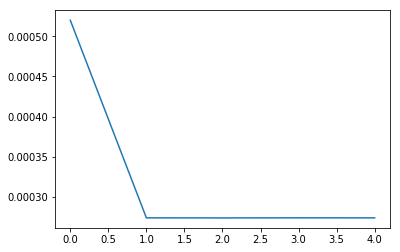

In [75]:
plt.plot(history.epoch, history.history['loss'])

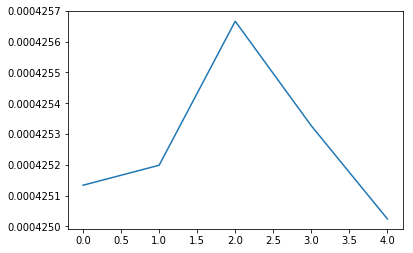

In [76]:
plt.plot(history.epoch, history.history['val_loss'])